In the 'Fraud transaction detection-knn' file the dataset is cleaned and saved as fraud_detection.csv. This file is used for implementing logistic regression.

In [10]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

# Reading in the dataset 

df = pd.read_csv('fraud_prediction.csv')

C:\Users\Ripul-CI\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split

#Creating the features and target

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

#Creating the training and testing data

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

Next we will implement a base logistic regression classifier and evaluate its accuracy score. 

In [3]:
from sklearn import linear_model

#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression()

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [4]:
#Accuracy score of the logistic regression model

logistic_regression.score(X_test, y_test)

0.5893697083725306

the inverse regularization strength i.e. C is fine tuned by GridSearchCV algorithm

A logistic regression model is first initialized with the penalty argument set to L1. A grid is then initialized with the possible values of inverse regularization strengths that go from 0.0001 to 10.

In [6]:
from sklearn.model_selection import GridSearchCV

#Building the model with L1 penality 

logistic_regression = linear_model.LogisticRegression(penalty='l1')

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(logistic_regression, {'C':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter

print("The most optimal inverse regularization strength is:", grid.best_params_)

C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWar

The most optimal inverse regularization strength is: {'C': 10}


We can now build the model using C=10

In [7]:
#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression(C = 10, penalty = 'l1')

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
#Accuracy score of the logistic regression model

logistic_regression.score(X_test, y_test)

0.9968250235183443

To check whether the GridSearchCV algorithm is giving accurate values, the values of accuracy scores are plotted in y-axis with the different C values on the X-axis.

C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

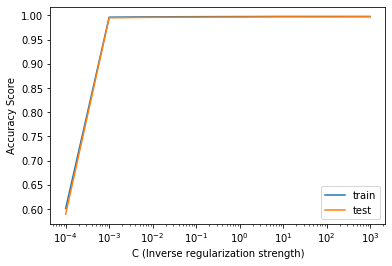

In [11]:
train_errors = []
test_errors = []

C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of C

for value in C_list:

 # Create LogisticRegression object and fit
 logistic_regression = linear_model.LogisticRegression(C= value, penalty = 'l1')
 logistic_regression.fit(X_train, y_train)

 # Evaluate error rates and append to lists
 train_errors.append(logistic_regression.score(X_train, y_train) )
 test_errors.append(logistic_regression.score(X_test, y_test))

# Plot results
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

It can be seen that C=10 gives high values of accuracy both on train and test sets.

By observing these plots we can analyse if there are any overfitting or underfitting problems.

Scaling is also a crucial step in machine learning. We used StandardScaler() function

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('logistic_reg', linear_model.LogisticRegression(C = 10, penalty = 'l1'))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

logistic_regression_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

logistic_regression_scaled.score(X_test, y_test)

C:\Users\Ripul-CI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9972953904045155

By scaling accuracy improved by 0.1%

**Interpreting the logistic regression model**

Logistic regression is highly interpretable as we can see the model as a function of the input variables. The logistic regression model consists of coefficients for each variable and an intercept that can be used to explain how the model works.

In [13]:
#Printing out the coefficients of each variable 

print(logistic_regression.coef_)

[[ 3.97763861e-05  2.28614256e-01 -5.36148646e-06  2.46702446e-05
  -3.54150475e-05 -1.52457380e-06 -5.82285367e-08 -1.16672830e+01
  -9.33552801e+00 -1.70486242e+01 -1.20289699e+01 -9.31854058e+00]]


In [14]:
#Printing out the intercept of the model

print(logistic_regression.intercept_)

[3.26285791]


The following equation analogous to the logistic regression model is constructed from the coeficient of the variables and the intercept :)

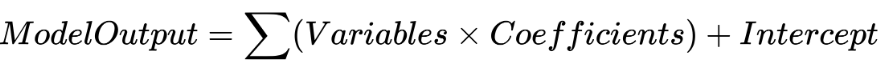